In [37]:
import pandas as pd
import ipynb.fs.full.eye_image_format as eif
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('dataset/dataset.csv')
X, y = eif.eye_image_format(df)
print(X.shape, y.shape)

(2874, 26, 34, 1) (2874, 1)


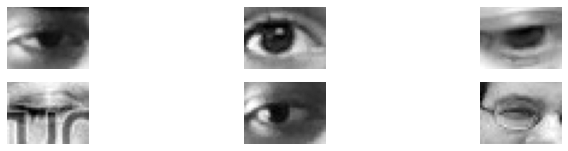

In [39]:
# apresentação das primeiras 6 imagens
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(6, 3, i+1)
    plt.axis('off')
    plt.imshow(X[i], cmap='gray')
#plt.savefig('eye_dataset.png')

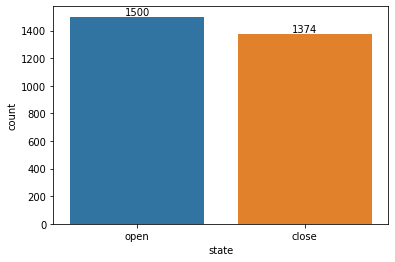

In [81]:
# Verificação do balanceamento dos dados rotulados
ax = sns.countplot(x=df['state'])
for container in ax.containers:
    ax.bar_label(container)

In [41]:
# Redimensionamento de dados
n_total = len(X)
X_result = np.empty((n_total, 26, 34, 1))

for i, x in enumerate(X):
    img = x.reshape((26, 34, 1))
    
    X_result[i] = img

In [42]:
# Separação de dados de treinamento e de validação
x_train, x_val, y_train, y_val = train_test_split(X_result, y, test_size=0.3)

np.save('dataset/x_train.npy', x_train)
np.save('dataset/y_train.npy', y_train)
np.save('dataset/x_val.npy', x_val)
np.save('dataset/y_val.npy', y_val)

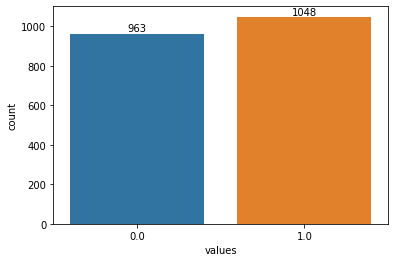

In [80]:
# Verificação do balanceamento dos dados de treino
ax = sns.countplot(x=pd.DataFrame(y_train, columns=['values'])['values'])
for container in ax.containers:
    ax.bar_label(container)